In [1]:
# set up environment 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from matplotlib.ticker import FuncFormatter

print ("loading completed")

loading completed


In [2]:
data = pd.read_csv("datasets/africa_food_prices.csv")
afb = data.copy()
afb

,Unnamed: 0,country_id,country,state_id,state,market_id,market,produce_id,produce,currency_id,...,pt_id,market_type,um_unit_id,quantity,month_number,year,price,price_in_usd,month_name,mp_commoditysource
0,15427,4,Algeria,344,Alger,1794,Algiers,52,Rice - Retail,0,...,15,Retail,5,KG,4,2015,90.0000,0.497238,April,NaN
1,15428,4,Algeria,344,Alger,1794,Algiers,52,Rice - Retail,0,...,15,Retail,5,KG,5,2015,96.0000,0.530387,May,NaN
2,15429,4,Algeria,344,Alger,1794,Algiers,52,Rice - Retail,0,...,15,Retail,5,KG,6,2015,96.0000,0.530387,June,NaN
3,15430,4,Algeria,344,Alger,1794,Algiers,52,Rice - Retail,0,...,15,Retail,5,KG,7,2015,83.0000,0.458564,July,NaN
4,15431,4,Algeria,344,Alger,1794,Algiers,52,Rice - Retail,0,...,15,Retail,5,KG,8,2015,80.0000,0.441989,August,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
956774,2050633,271,Zimbabwe,3444,Midlands,5594,Mbilashaba,432,Beans (sugar) - Retail,0,...,15,Retail,5,KG,6,2021,233.3333,0.644567,June,NaN
956775,2050634,271,Zimbabwe,3444,Midlands,5594,Mbilashaba,539,Toothpaste - Retail,0,...,15,Retail,116,100 ML,6,2021,112.5000,0.310773,June,NaN
956776,2050635,271,Zimbabwe,3444,Midlands,5594,Mbilashaba,540,Laundry soap - Retail,0,...,15,Retail,5,KG,6,2021,114.0000,0.314917,June,NaN
956777,2050636,271,Zimbabwe,3444,Midlands,5594,Mbilashaba,541,Handwash soap - Retail,0,...,15,Retail,66,250 G,6,2021,59.5000,0.164365,June,NaN


In [3]:
afb.shape

(956779, 21)

In [4]:
afb.columns

Index(['Unnamed: 0', 'country_id', 'country', 'state_id', 'state', 'market_id',
       'market', 'produce_id', 'produce', 'currency_id', 'currency', 'pt_id',
       'market_type', 'um_unit_id', 'quantity', 'month_number', 'year',
       'price', 'price_in_usd', 'month_name', 'mp_commoditysource'],
      dtype='object')

In [5]:
afb.drop('Unnamed: 0', axis=1, inplace=True)

In [6]:
afb.drop('mp_commoditysource', axis=1, inplace=True)

In [7]:
afb.count()

country_id      956779
country         956779
state_id        956779
state           830101
market_id       956779
market          956779
produce_id      956779
produce         956779
currency_id     956779
currency        956779
pt_id           956779
market_type     956779
um_unit_id      956779
quantity        956779
month_number    956779
year            956779
price           956779
price_in_usd    956779
month_name      956779
dtype: int64

In [8]:
afb.sample(10)

,country_id,country,state_id,state,market_id,market,produce_id,produce,currency_id,currency,pt_id,market_type,um_unit_id,quantity,month_number,year,price,price_in_usd,month_name
773980,205,Rwanda,21973,West/Iburengerazuba,1063,Gisenyi,454,Avocados - Retail,0,RWF,15,Retail,33,Unit,6,2013,301.125,0.190345,June
870730,70001,South Sudan,2766,NaN,1391,Jau,68,Cassava - Retail,0,SSP,15,Retail,47,3.5 KG,12,2018,450.000,0.334821,December
107636,45,Cameroon,816,Centre,5272,Yaoundé-Marché 8e,486,Fish (frozen) - Retail,0,XAF,15,Retail,5,KG,10,2019,1075.000,1.773927,October
572332,181,Niger,2205,Maradi,628,Dakoro,51,Maize - Retail,0,XOF,15,Retail,5,KG,12,2009,228.000,0.376238,December
691301,205,Rwanda,21969,East/Iburasirazuba,1561,Matimba,65,Sorghum - Retail,0,RWF,15,Retail,5,KG,12,2013,220.000,0.139064,December
817016,217,Senegal,47586,Fatick,415,Gossas,73,Millet - Retail,0,XOF,15,Retail,5,KG,5,2010,147.500,0.243399,May
655732,205,Rwanda,2587,Kigali City/Umujyi wa Kigali,1054,Gahanga,68,Cassava - Retail,0,RWF,15,Retail,5,KG,7,2010,152.500,0.096397,July
133565,49,Central African Republic,863,Ombella M'Poko,2080,Bégoua,141,Meat (beef) - Retail,0,XAF,15,Retail,5,KG,9,2017,3500.000,5.775578,September
176241,79,Ethiopia,1229,Amhara,469,Bati,383,Livestock (Goat) - Retail,0,ETB,15,Retail,61,Head,9,2020,3600.000,49.315068,September
552391,181,Niger,2202,Agadez,546,Agadez Commune,73,Millet - Retail,0,XOF,15,Retail,5,KG,3,1990,60.000,0.099010,March


In [9]:
afb['currency_id'].value_counts()

0    956779
Name: currency_id, dtype: int64

In [10]:
afb.drop('currency_id', axis=1, inplace=True)
afb.head()

,country_id,country,state_id,state,market_id,market,produce_id,produce,currency,pt_id,market_type,um_unit_id,quantity,month_number,year,price,price_in_usd,month_name
0,4,Algeria,344,Alger,1794,Algiers,52,Rice - Retail,DZD,15,Retail,5,KG,4,2015,90.0,0.497238,April
1,4,Algeria,344,Alger,1794,Algiers,52,Rice - Retail,DZD,15,Retail,5,KG,5,2015,96.0,0.530387,May
2,4,Algeria,344,Alger,1794,Algiers,52,Rice - Retail,DZD,15,Retail,5,KG,6,2015,96.0,0.530387,June
3,4,Algeria,344,Alger,1794,Algiers,52,Rice - Retail,DZD,15,Retail,5,KG,7,2015,83.0,0.458564,July
4,4,Algeria,344,Alger,1794,Algiers,52,Rice - Retail,DZD,15,Retail,5,KG,8,2015,80.0,0.441989,August


In [11]:
afb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 956779 entries, 0 to 956778
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   country_id    956779 non-null  int64  
 1   country       956779 non-null  object 
 2   state_id      956779 non-null  int64  
 3   state         830101 non-null  object 
 4   market_id     956779 non-null  int64  
 5   market        956779 non-null  object 
 6   produce_id    956779 non-null  int64  
 7   produce       956779 non-null  object 
 8   currency      956779 non-null  object 
 9   pt_id         956779 non-null  int64  
 10  market_type   956779 non-null  object 
 11  um_unit_id    956779 non-null  int64  
 12  quantity      956779 non-null  object 
 13  month_number  956779 non-null  int64  
 14  year          956779 non-null  int64  
 15  price         956779 non-null  float64
 16  price_in_usd  956779 non-null  float64
 17  month_name    956779 non-null  object 
dtypes: f

In [12]:
# The state column contains nulll values 
# The syntax will help to locate the nan values in the datasets
afb[afb['state'].isnull()]
state_null = afb[afb['state'].isnull()]

In [13]:
# to investigate all the state_id unique values
# the state id data starts from the 0
state_null['state_id'].value_counts().head(50)

0        8302
2114     5708
1850     5427
2122     5339
2120     5164
2121     4776
2118     4498
2115     4017
2112     3462
2113     3312
2119     3002
2116     2998
2747     2850
12912    2480
1844     2398
1843     2377
1845     2307
12918    2280
37021    2127
2748     2114
2746     1993
2766     1944
1842     1915
1838     1817
2754     1792
1834     1727
2783     1657
2750     1406
1836     1337
1846     1336
2751     1307
12915    1269
12927    1243
1837     1242
1851     1209
1832     1195
1849     1194
1847     1182
1839     1174
1835     1133
1833     1130
1840     1114
1841     1099
1848     1092
1829     1091
870      1074
881      1073
1830     1056
2765     1050
2768     1045
Name: state_id, dtype: int64

In [14]:
# where state id equals 0
state_null[state_null['state_id'] == 0]
# brings out the state market with the nan values
state_null[state_null['state_id'] == 0]['market'].value_counts()

National Average    3446
Nalut               1328
Azzintan            1223
Ghat                1212
AlMarj              1093
Name: market, dtype: int64

In [15]:
afb.rename(columns={'state':'state/district'}, inplace=True)
afb.head()

,country_id,country,state_id,state/district,market_id,market,produce_id,produce,currency,pt_id,market_type,um_unit_id,quantity,month_number,year,price,price_in_usd,month_name
0,4,Algeria,344,Alger,1794,Algiers,52,Rice - Retail,DZD,15,Retail,5,KG,4,2015,90.0,0.497238,April
1,4,Algeria,344,Alger,1794,Algiers,52,Rice - Retail,DZD,15,Retail,5,KG,5,2015,96.0,0.530387,May
2,4,Algeria,344,Alger,1794,Algiers,52,Rice - Retail,DZD,15,Retail,5,KG,6,2015,96.0,0.530387,June
3,4,Algeria,344,Alger,1794,Algiers,52,Rice - Retail,DZD,15,Retail,5,KG,7,2015,83.0,0.458564,July
4,4,Algeria,344,Alger,1794,Algiers,52,Rice - Retail,DZD,15,Retail,5,KG,8,2015,80.0,0.441989,August


In [16]:
afb.loc[afb['market'] == 'National Average', 'state/district'] = afb.loc[afb['market'] == 'National Average', 'state/district'].fillna(value='National')

In [17]:
afb[afb['market'] == 'National Average']

,country_id,country,state_id,state/district,market_id,market,produce_id,produce,currency,pt_id,market_type,um_unit_id,quantity,month_number,year,price,price_in_usd,month_name
140847,50,Chad,0,National,1965,National Average,64,Rice (imported) - Retail,XAF,15,Retail,5,KG,11,2018,567.00,0.935644,November
140848,50,Chad,0,National,1965,National Average,73,Millet - Retail,XAF,15,Retail,5,KG,10,2018,191.00,0.315182,October
140849,50,Chad,0,National,1965,National Average,73,Millet - Retail,XAF,15,Retail,5,KG,11,2018,175.00,0.288779,November
140850,50,Chad,0,National,1965,National Average,282,Sorghum (red) - Retail,XAF,15,Retail,5,KG,10,2018,172.00,0.283828,October
140851,50,Chad,0,National,1965,National Average,282,Sorghum (red) - Retail,XAF,15,Retail,5,KG,11,2018,147.00,0.242574,November
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886313,235,Swaziland,0,National,101,National Average,432,Beans (sugar) - Retail,SZL,15,Retail,5,KG,9,2019,23.13,1.285000,September
886314,235,Swaziland,0,National,101,National Average,432,Beans (sugar) - Retail,SZL,15,Retail,5,KG,10,2019,23.13,1.285000,October
886315,235,Swaziland,0,National,101,National Average,432,Beans (sugar) - Retail,SZL,15,Retail,5,KG,11,2019,23.88,1.326667,November
886316,235,Swaziland,0,National,101,National Average,432,Beans (sugar) - Retail,SZL,15,Retail,5,KG,12,2019,23.13,1.285000,December


In [18]:
afb.loc[afb['market'] == 'Nalut', 'state/district'] = afb.loc[afb['market'] == 'Nalut', 'state/district'].fillna(value='National')

In [19]:
afb[afb['market'] == 'Nalut']

,country_id,country,state_id,state/district,market_id,market,produce_id,produce,currency,pt_id,market_type,um_unit_id,quantity,month_number,year,price,price_in_usd,month_name
343131,145,Libya,0,National,2339,Nalut,50,Beans - Retail,LYD,15,Retail,24,400 G,7,2017,2.5000,0.416667,July
343132,145,Libya,0,National,2339,Nalut,50,Beans - Retail,LYD,15,Retail,24,400 G,8,2017,2.5000,0.416667,August
343133,145,Libya,0,National,2339,Nalut,50,Beans - Retail,LYD,15,Retail,24,400 G,9,2017,2.5000,0.416667,September
343134,145,Libya,0,National,2339,Nalut,50,Beans - Retail,LYD,15,Retail,24,400 G,10,2017,2.5000,0.416667,October
343135,145,Libya,0,National,2339,Nalut,50,Beans - Retail,LYD,15,Retail,24,400 G,11,2017,2.5000,0.416667,November
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
344454,145,Libya,0,National,2339,Nalut,545,Shampoo - Retail,LYD,15,Retail,120,250 ML,1,2020,5.4000,0.900000,January
344455,145,Libya,0,National,2339,Nalut,545,Shampoo - Retail,LYD,15,Retail,120,250 ML,2,2020,5.2063,0.867717,February
344456,145,Libya,0,National,2339,Nalut,545,Shampoo - Retail,LYD,15,Retail,120,250 ML,3,2020,5.2288,0.871467,March
344457,145,Libya,0,National,2339,Nalut,545,Shampoo - Retail,LYD,15,Retail,120,250 ML,5,2020,5.5000,0.916667,May


In [20]:
afb.loc[afb['market'] == 'Azzintan', 'state/district'] = afb.loc[afb['market'] == 'Azzintan', 'state/district'].fillna(value='Al Jabal al Gharbi')

In [21]:
afb[afb['market'] == 'Azzintan']

,country_id,country,state_id,state/district,market_id,market,produce_id,produce,currency,pt_id,market_type,um_unit_id,quantity,month_number,year,price,price_in_usd,month_name
344459,145,Libya,0,Al Jabal al Gharbi,2340,Azzintan,50,Beans - Retail,LYD,15,Retail,24,400 G,7,2017,2.5000,0.416667,July
344460,145,Libya,0,Al Jabal al Gharbi,2340,Azzintan,50,Beans - Retail,LYD,15,Retail,24,400 G,8,2017,2.5000,0.416667,August
344461,145,Libya,0,Al Jabal al Gharbi,2340,Azzintan,50,Beans - Retail,LYD,15,Retail,24,400 G,9,2017,2.5000,0.416667,September
344462,145,Libya,0,Al Jabal al Gharbi,2340,Azzintan,50,Beans - Retail,LYD,15,Retail,24,400 G,10,2017,2.5000,0.416667,October
344463,145,Libya,0,Al Jabal al Gharbi,2340,Azzintan,50,Beans - Retail,LYD,15,Retail,24,400 G,11,2017,2.5000,0.416667,November
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
345677,145,Libya,0,Al Jabal al Gharbi,2340,Azzintan,545,Shampoo - Retail,LYD,15,Retail,120,250 ML,1,2020,5.2575,0.876250,January
345678,145,Libya,0,Al Jabal al Gharbi,2340,Azzintan,545,Shampoo - Retail,LYD,15,Retail,120,250 ML,2,2020,4.1250,0.687500,February
345679,145,Libya,0,Al Jabal al Gharbi,2340,Azzintan,545,Shampoo - Retail,LYD,15,Retail,120,250 ML,5,2020,7.1400,1.190000,May
345680,145,Libya,0,Al Jabal al Gharbi,2340,Azzintan,545,Shampoo - Retail,LYD,15,Retail,120,250 ML,6,2020,3.5700,0.595000,June


In [22]:
afb.loc[afb['market'] == 'Ghat', 'state/district'] = afb.loc[afb['market'] == 'Ghat', 'state/district'].fillna(value='Ghat')

In [23]:
afb[afb['market'] == 'Ghat']

,country_id,country,state_id,state/district,market_id,market,produce_id,produce,currency,pt_id,market_type,um_unit_id,quantity,month_number,year,price,price_in_usd,month_name
346775,145,Libya,0,Ghat,2342,Ghat,50,Beans - Retail,LYD,15,Retail,24,400 G,10,2017,2.50,0.416667,October
346776,145,Libya,0,Ghat,2342,Ghat,50,Beans - Retail,LYD,15,Retail,24,400 G,11,2017,2.88,0.480000,November
346777,145,Libya,0,Ghat,2342,Ghat,50,Beans - Retail,LYD,15,Retail,24,400 G,12,2017,3.50,0.583333,December
346778,145,Libya,0,Ghat,2342,Ghat,50,Beans - Retail,LYD,15,Retail,24,400 G,1,2018,3.00,0.500000,January
346779,145,Libya,0,Ghat,2342,Ghat,50,Beans - Retail,LYD,15,Retail,24,400 G,2,2018,3.00,0.500000,February
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
347982,145,Libya,0,Ghat,2342,Ghat,545,Shampoo - Retail,LYD,15,Retail,120,250 ML,1,2020,9.25,1.541667,January
347983,145,Libya,0,Ghat,2342,Ghat,545,Shampoo - Retail,LYD,15,Retail,120,250 ML,2,2020,11.25,1.875000,February
347984,145,Libya,0,Ghat,2342,Ghat,545,Shampoo - Retail,LYD,15,Retail,120,250 ML,3,2020,12.00,2.000000,March
347985,145,Libya,0,Ghat,2342,Ghat,545,Shampoo - Retail,LYD,15,Retail,120,250 ML,5,2020,9.00,1.500000,May


In [24]:
afb.loc[afb['market'] == 'AlMarj', 'state/district'] = afb.loc[afb['market'] == 'AlMarj', 'state/district'].fillna(value='Al Marj')

In [25]:
afb[afb['market'] == 'AlMarj']

,country_id,country,state_id,state/district,market_id,market,produce_id,produce,currency,pt_id,market_type,um_unit_id,quantity,month_number,year,price,price_in_usd,month_name
345682,145,Libya,0,Al Marj,2341,AlMarj,50,Beans - Retail,LYD,15,Retail,24,400 G,12,2017,2.50,0.416667,December
345683,145,Libya,0,Al Marj,2341,AlMarj,50,Beans - Retail,LYD,15,Retail,24,400 G,1,2018,2.75,0.458333,January
345684,145,Libya,0,Al Marj,2341,AlMarj,50,Beans - Retail,LYD,15,Retail,24,400 G,2,2018,2.50,0.416667,February
345685,145,Libya,0,Al Marj,2341,AlMarj,50,Beans - Retail,LYD,15,Retail,24,400 G,3,2018,2.50,0.416667,March
345686,145,Libya,0,Al Marj,2341,AlMarj,50,Beans - Retail,LYD,15,Retail,24,400 G,4,2018,2.50,0.416667,April
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346770,145,Libya,0,Al Marj,2341,AlMarj,545,Shampoo - Retail,LYD,15,Retail,120,250 ML,12,2019,5.00,0.833333,December
346771,145,Libya,0,Al Marj,2341,AlMarj,545,Shampoo - Retail,LYD,15,Retail,120,250 ML,1,2020,5.00,0.833333,January
346772,145,Libya,0,Al Marj,2341,AlMarj,545,Shampoo - Retail,LYD,15,Retail,120,250 ML,5,2020,7.00,1.166667,May
346773,145,Libya,0,Al Marj,2341,AlMarj,545,Shampoo - Retail,LYD,15,Retail,120,250 ML,6,2020,8.00,1.333333,June


In [26]:
#Verify to see the state id columns are filled
state_null = afb[afb['state/district'].isnull()]
state_null['state_id'].value_counts().head(70)

2114     5708
1850     5427
2122     5339
2120     5164
2121     4776
         ... 
12931     303
12924     270
12920     246
12905     246
12908       3
Name: state_id, Length: 70, dtype: int64

In [27]:
state_null[state_null['state_id'] == 2114]

,country_id,country,state_id,state/district,market_id,market,produce_id,produce,currency,pt_id,market_type,um_unit_id,quantity,month_number,year,price,price_in_usd,month_name
507654,170,Mozambique,2114,NaN,329,Inhambane,64,Rice (imported) - Retail,MZN,15,Retail,5,KG,6,2009,20.50,0.325397,June
507655,170,Mozambique,2114,NaN,329,Inhambane,64,Rice (imported) - Retail,MZN,15,Retail,5,KG,7,2009,20.00,0.317460,July
507656,170,Mozambique,2114,NaN,329,Inhambane,64,Rice (imported) - Retail,MZN,15,Retail,5,KG,8,2009,20.00,0.317460,August
507657,170,Mozambique,2114,NaN,329,Inhambane,64,Rice (imported) - Retail,MZN,15,Retail,5,KG,9,2009,20.00,0.317460,September
507658,170,Mozambique,2114,NaN,329,Inhambane,64,Rice (imported) - Retail,MZN,15,Retail,5,KG,10,2009,19.00,0.301587,October
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
513357,170,Mozambique,2114,NaN,2753,Vilanculos,431,"Maize meal (white, without bran) - Retail",MZN,15,Retail,5,KG,10,2020,41.67,0.661429,October
513358,170,Mozambique,2114,NaN,2753,Vilanculos,431,"Maize meal (white, without bran) - Retail",MZN,15,Retail,5,KG,2,2021,47.22,0.749524,February
513359,170,Mozambique,2114,NaN,2753,Vilanculos,431,"Maize meal (white, without bran) - Retail",MZN,15,Retail,5,KG,3,2021,47.00,0.746032,March
513360,170,Mozambique,2114,NaN,2753,Vilanculos,431,"Maize meal (white, without bran) - Retail",MZN,15,Retail,5,KG,4,2021,47.22,0.749524,April


In [28]:
moz = afb[afb['country'] == 'Mozambique']
moz.isna().values.any()

True

In [29]:
moz_fill = {'Nampula': 'Nampula',
               'Maputo': 'Maputo',
               'Manica': 'Manica',
               'Gorongoza' : 'Sofala',
               'Chokwe': 'Gaza',
               'Angónia': 'Tete',
               'Lichinga': 'Niassa',
               'Beira': 'Sofala',
               'Pemba': 'Cabo Degado',
               'Maxixe': 'Inhambane',
               'Tete': 'Tete',
               'Mocuba': 'Zambezia',
               'Montepuez': 'Cabo Degado',
               'Chimoio': 'Manica',
               'Quelimane': 'Zambezia',
               'Massinga': 'Inhambane',
               'Inhambane': 'Inhambane',
               'Alto Molócuè': 'Zambezia',
               'Ribaue': 'Nampula',
               'Mutarara': 'Tete',
               'Nhamatanda': 'Sofala',
               'Xai Xai': 'Gaza',
               'Cuamba': 'Niassa',
               'Milange': 'Zambezia',
               'Nacala': 'Nampula',
               'Govuro': 'Inhambane',
               'Caia': 'Sofala',
               'Mandimba': 'Niassa',
               'Panda': 'Inhambane',
               'Chibuto' : 'Gaza',
               'Namaacha': 'Maputo',
               'Gondola' : 'Manica',
               'Vilanculos': 'Inhambane',
               'Morrumbene': 'Inhambane',
               'Inhassoro': 'Inhambane',
               'Mabote': 'Inhambane',
               'Balama': 'Cabo Delgado',
               'Namuno': 'Cabo Delgado',
               'Murrupula': 'Nampula',
               'Inharrime': 'Inhambane',
               'Funhalouro': 'Inhambane',
               'Macanga': 'Tete',
               'Changara': 'Tete',
               'Báruè': 'Manica',
               'Moamba': 'Maputo',
               'Boane': 'Maputo',
               'Malema': 'Nampula',
               'Buzi': 'Sofala',
               'Manhica': 'Maputo',
               'Chicualacuala Mapai': 'Gaza',
               'Bela Vista': 'Maputo',
               'Cidade da Matola': 'Maputo',
               'Konyokonyo': 'Juba',

              }

In [30]:
afb['state/district'] = afb.apply(lambda row: moz_fill.get(row['market']) if pd.isna(row['state/district']) else row['state/district'], axis=1)

In [31]:
l = state_null['market'].value_counts().index.to_list()

In [32]:
to_find = []
for m in l:
    if m not in moz_fill:
        to_find.append(m)

In [33]:
to_find

['Jau',
 'Aweil Town',
 'Ndjamena',
 'Brak',
 'Sebha',
 'Bor',
 'Rumbek',
 'Zliten',
 'Ubari',
 'Algatroun',
 'Tobruk',
 'Ghiryan',
 'Albayda',
 'Tarhuna',
 'Bani Waleed',
 'Zwara',
 'Benghazi',
 'Suq Aljumaa',
 'Abusliem',
 'Alkufra',
 'Aljufra',
 'Sabratha',
 'Derna',
 'Azzawya',
 'Misrata',
 'Ghadamis',
 'Sirt',
 'Ejdabia',
 'Al Aziziya',
 'Malakal',
 'Alkhums',
 'Bentiu',
 'Torit',
 'Kuajok',
 'Yida',
 'Moussoro',
 'Tripoli center',
 'Hai Alandalus',
 'Moundou',
 'Abeche',
 'Hhohho',
 'Shiselweni',
 'Manzini',
 'Lubombo',
 'Sarh',
 'Yefren',
 'Tajoura',
 'Msallata',
 'Ashshgega',
 'Minkaman',
 'Ain Zara',
 'Yambio',
 'Janzour',
 'Mongo',
 'Mao',
 'Murzuq',
 'Am Timan',
 'Bol',
 'Wadi Etba',
 'Aniet',
 'Oum Hadjer',
 'Bunj',
 'Rubkona',
 'Aboudeia',
 'Kapoeta South',
 'Bousso',
 'Abdi',
 'Gore',
 'Bokoro',
 'Iriba',
 'Goz Beida',
 'Massakory',
 'Amdam',
 'Makpandu',
 'Biltine',
 'Melut',
 'Laï',
 'Mandelia',
 'Bongor',
 'Kélo',
 'Ngouri',
 'Peni',
 'Nokou',
 'Benoye',
 'Kyabe',
 'Su

In [34]:
state_null = afb[afb['state/district'].isnull()]
state_null['state_id'].value_counts()

1850     5427
2747     2850
12912    2480
1844     2398
1843     2377
1845     2307
12918    2280
37021    2127
2746     1993
2766     1944
1842     1915
1838     1817
2754     1792
1834     1727
2783     1657
2750     1406
1836     1337
1846     1336
2751     1307
12915    1269
12927    1243
1837     1242
1851     1209
1832     1195
1849     1194
1847     1182
1839     1174
1835     1133
1833     1130
1840     1114
1841     1099
1848     1092
1829     1091
870      1074
881      1073
1830     1056
2765     1050
2768     1045
12923    1003
873       921
12914     887
2782      829
2784      829
1852      750
12928     735
12925     729
876       721
12910     588
875       586
12921     552
12904     495
12922     424
12911     405
12930     320
12931     303
12924     270
12920     246
12905     246
12908       3
12907       2
Name: state_id, dtype: int64

In [35]:
libya_null = state_null[state_null['country'] == 'Libya']
libya_null['market'].value_counts()

Brak              1337
Sebha             1336
Zliten            1267
Ubari             1242
Tobruk            1209
Algatroun         1209
Ghiryan           1199
Albayda           1195
Tarhuna           1194
Bani Waleed       1182
Zwara             1179
Benghazi          1174
Suq Aljumaa       1137
Abusliem          1135
Alkufra           1133
Aljufra           1130
Sabratha          1128
Derna             1114
Azzawya           1113
Misrata           1110
Ghadamis          1099
Sirt              1092
Ejdabia           1091
Al Aziziya        1056
Alkhums           1010
Tripoli center     858
Hai Alandalus      845
Yefren             750
Tajoura            743
Msallata           717
Ashshgega          716
Ain Zara           709
Janzour            704
Murzuq             610
Wadi Etba          579
Name: market, dtype: int64

In [36]:
libya_fill = {
        'Brak':'Wadi al Shatii District',
        'Sebha':'Sabha District',
        'Zliten':'Murqub District',
        'Ubari':'Wadi al Hayaa District',
        'Tobruk':'Butnan District',
        'Algatroun':'Murzuq District',
        'Ghiryan':'Jabal al Gharbi District',
        'Albayda':'Jabal al Akhdar District',
        'Tarhuna':'Murqub District',
        'Bani Waleed':'Misrata District',
        'Zwara':'Nuqat al Khams District',
        'Benghazi':'Benghazi District',
        'Wadi Etba':'Murzuq District',
        'Murzuq':'Murzuq District',
        'Janzour':'Tripoli District',
        'Ain Zara':'Tripoli District',
        'Ashshgega':'Tripoli District',
        'Msallata':'Murqub District',
        'Tajoura':'Tripoli District',
        'Yefren':'Jabal al Gharbi District',
        'Hai Alandalus':'Tripoli District',
        'Tripoli center':'Tripoli District',
        'Alkhums':'Murqub District',
        'Al Aziziya':'Jafara',
        'Sirt':'Sirte District',
        'Ghadamis':'Nalut District',
        'Misrata':'Misrata District',
        'Azzawya':'	Zawiya District',
        'Derna':'Derna District',
        'Sabratha':'Zawiya District',
        'Aljufra':'Jufra District',
        'Suq Aljumaa':'Tripoli District',
        'Abusliem':'Tripoli District',
        'Alkufra':'	Kufra District'
}

In [37]:
afb['state/district'] = afb.apply(lambda row: libya_fill.get(row['market']) if pd.isna(row['state/district']) else row['state/district'], axis=1)

In [38]:
state_null = afb[afb['state/district'].isnull()]
state_null['state_id'].value_counts() 

2747     2850
12912    2480
12918    2280
37021    2127
2746     1993
2766     1944
2754     1792
2783     1657
2750     1406
2751     1307
12915    1269
12927    1243
1829     1091
870      1074
881      1073
2765     1050
2768     1045
12923    1003
873       921
12914     887
2782      829
2784      829
12928     735
12925     729
876       721
12910     588
875       586
12921     552
12904     495
12922     424
12911     405
12930     320
12931     303
12924     270
12920     246
12905     246
12908       3
12907       2
Name: state_id, dtype: int64

In [39]:
state_null[state_null['country'] == 'South Sudan']

,country_id,country,state_id,state/district,market_id,market,produce_id,produce,currency,pt_id,market_type,um_unit_id,quantity,month_number,year,price,price_in_usd,month_name
857868,70001,South Sudan,2746,None,1390,Rumbek,52,Rice - Retail,SSP,15,Retail,5,KG,3,2018,296.0,0.220238,March
857869,70001,South Sudan,2746,None,1390,Rumbek,52,Rice - Retail,SSP,15,Retail,5,KG,4,2018,295.0,0.219494,April
857870,70001,South Sudan,2746,None,1390,Rumbek,52,Rice - Retail,SSP,15,Retail,5,KG,8,2018,300.0,0.223214,August
857871,70001,South Sudan,2746,None,1390,Rumbek,52,Rice - Retail,SSP,15,Retail,5,KG,9,2018,300.0,0.223214,September
857872,70001,South Sudan,2746,None,1390,Rumbek,52,Rice - Retail,SSP,15,Retail,5,KG,10,2018,220.0,0.163690,October
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
875491,70001,South Sudan,37021,None,3029,Melut,758,Milk (fresh) - Retail,SSP,15,Retail,15,L,1,2021,250.0,0.186012,January
875492,70001,South Sudan,37021,None,3029,Melut,758,Milk (fresh) - Retail,SSP,15,Retail,15,L,2,2021,500.0,0.372024,February
875493,70001,South Sudan,37021,None,3029,Melut,758,Milk (fresh) - Retail,SSP,15,Retail,15,L,5,2021,580.0,0.431548,May
875494,70001,South Sudan,37021,None,3029,Melut,758,Milk (fresh) - Retail,SSP,15,Retail,15,L,6,2021,600.0,0.446429,June


In [40]:
afb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 956779 entries, 0 to 956778
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   country_id      956779 non-null  int64  
 1   country         956779 non-null  object 
 2   state_id        956779 non-null  int64  
 3   state/district  918004 non-null  object 
 4   market_id       956779 non-null  int64  
 5   market          956779 non-null  object 
 6   produce_id      956779 non-null  int64  
 7   produce         956779 non-null  object 
 8   currency        956779 non-null  object 
 9   pt_id           956779 non-null  int64  
 10  market_type     956779 non-null  object 
 11  um_unit_id      956779 non-null  int64  
 12  quantity        956779 non-null  object 
 13  month_number    956779 non-null  int64  
 14  year            956779 non-null  int64  
 15  price           956779 non-null  float64
 16  price_in_usd    956779 non-null  float64
 17  month_name

In [41]:
south_sudan_null = state_null[state_null['country'] == 'South Sudan']
south_sudan_null['market'].value_counts()

Jau              1944
Aweil Town       1792
Bor              1286
Rumbek           1284
Malakal          1050
Bentiu            983
Torit             972
Kuajok            936
Yida              898
Minkaman          709
Yambio            708
Aniet             490
Rubkona           479
Bunj              479
Kapoeta South     434
Makpandu          337
Melut             329
Suk Shabi         269
Wunrok            114
Akobo              21
Name: market, dtype: int64

In [42]:
south_sudan_fill = {
            'Ejdabia':'Al Wahat District',
            'Konyokonyo':'Central Equatoria',
            'Jau':'Ruweng Administrative Area',
            'Aweil Town':'Northern Bahr el Ghazal',
            'Bor':'Jonglei',
            'Rumbek':'Lakes',
            'Malakal':'Upper Nile',
            'Bentiu':'Unity',
            'Torit':'Eastern Equatoria',
            'Kuajok':'Warrap',
            'Yida':'Unity',
            'Aniet':'Southern Kordofan',
            'Yambio':'Western Equatoria',
            'Minkaman':'Lakes',
            'Rubkona':'Unity',
            'Bunj':'Eastern Nile',
            'Kapoeta South':'Eastern Equatoria',
            'Makpandu':'Western Equatoria',
            'Melut':'Upper Nile',
            'Suk Shabi':'Unity',
            'Wunrok':'Warrap State',
            'Akobo':'Jonglei'
}

In [43]:
afb['state/district'] = afb.apply(lambda row: south_sudan_fill.get(row['market']) if pd.isna(row['state/district']) else row['state/district'], axis=1)

In [44]:
state_null = afb[afb['state/district'].isnull()]
state_null['state_id'].value_counts()

12912    2480
12918    2280
2783     1657
12915    1269
12927    1243
870      1074
881      1073
12923    1003
873       921
12914     887
2784      829
2782      829
12928     735
12925     729
876       721
12910     588
875       586
12921     552
12904     495
12922     424
12911     405
12930     320
12931     303
12924     270
12920     246
12905     246
12908       3
12907       2
Name: state_id, dtype: int64

In [45]:
afb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 956779 entries, 0 to 956778
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   country_id      956779 non-null  int64  
 1   country         956779 non-null  object 
 2   state_id        956779 non-null  int64  
 3   state/district  934609 non-null  object 
 4   market_id       956779 non-null  int64  
 5   market          956779 non-null  object 
 6   produce_id      956779 non-null  int64  
 7   produce         956779 non-null  object 
 8   currency        956779 non-null  object 
 9   pt_id           956779 non-null  int64  
 10  market_type     956779 non-null  object 
 11  um_unit_id      956779 non-null  int64  
 12  quantity        956779 non-null  object 
 13  month_number    956779 non-null  int64  
 14  year            956779 non-null  int64  
 15  price           956779 non-null  float64
 16  price_in_usd    956779 non-null  float64
 17  month_name

In [46]:
chad = state_null[state_null['country']=='Chad' ]
market_list = chad['market'].value_counts().index.to_list()
region_list = ['Special Statute Region', 'Barh El Gazel Region', 'Logone Occidental Region', 'Ouaddaï Region', 'Moyen-Chari Region', 'Guéra Region','Kanem Region','Salamat Region','Lac Region','Batha Region','Salamat Region','Chari-Baguirmi Region','Ouaddaï Region','Logone Oriental Region', 'Hadjer-Lamis Region','Wadi Fira Region','Sila Region','Hadjer-Lami Region','Adamawa Region', 'Wadi Fira Region','Tandjilé Region','Chari-Baguirmi Region','Mayo-Kebbi Region', 'Tandjilé Region', 'Logone Occidental Region', 'Mandoul Region','Kanem Region','Logone Occidental Region','Moyen-Chari Region', 'Logone Oriental Region', 'Logone Oriental Region','Mayo-Kebbi Est Region','Mayo-Kebbi Est Region','Moyen-Chari Region', 'Mandoul Region', 'Mayo-Kebbi Ouest Region','Mandoul Region','Logone Oriental Region','Logone Oriental Region', 'Mayo-Kebbi Ouest Region', 'Logone Occidental Region', 'Batha Region', 'Logone Occidental Region', 'Logone Oriental Region','Wadi Fira Region','Chari-Baguirmi Region', 'Hadjer-Lamis Region', 'Wadi Fira Region', 'Guéra Region', 'Kanem Region','Batha Region', 'Guéra Region', 'Guéra Region', 'Salamat Region', 'Batha Region', 'Ennedi-Est Region', 'Borkou Region']

In [47]:
chad_fill = {}
for i in range(len(market_list)):
    chad_fill[market_list[i]] = region_list[i]
chad_fill

{'Ndjamena': 'Special Statute Region',
 'Moussoro': 'Barh El Gazel Region',
 'Moundou': 'Logone Occidental Region',
 'Abeche': 'Ouaddaï Region',
 'Sarh': 'Moyen-Chari Region',
 'Mongo': 'Guéra Region',
 'Mao': 'Kanem Region',
 'Am Timan': 'Salamat Region',
 'Bol': 'Lac Region',
 'Oum Hadjer': 'Batha Region',
 'Aboudeia': 'Salamat Region',
 'Bousso': 'Chari-Baguirmi Region',
 'Abdi': 'Ouaddaï Region',
 'Gore': 'Logone Oriental Region',
 'Bokoro': 'Hadjer-Lamis Region',
 'Iriba': 'Wadi Fira Region',
 'Goz Beida': 'Sila Region',
 'Massakory': 'Hadjer-Lami Region',
 'Amdam': 'Adamawa Region',
 'Biltine': 'Wadi Fira Region',
 'Laï': 'Tandjilé Region',
 'Mandelia': 'Chari-Baguirmi Region',
 'Bongor': 'Mayo-Kebbi Region',
 'Kélo': 'Tandjilé Region',
 'Ngouri': 'Logone Occidental Region',
 'Peni': 'Mandoul Region',
 'Nokou': 'Kanem Region',
 'Benoye': 'Logone Occidental Region',
 'Kyabe': 'Moyen-Chari Region',
 'Mbaïbokoum': 'Logone Oriental Region',
 'Mbaïnamar': 'Logone Oriental Region',
 'G

In [48]:
afb['state/district'] = afb.apply(lambda row: chad_fill.get(row['market']) if pd.isna(row['state/district']) else row['state/district'], axis=1)

In [49]:
state_null = afb[afb['state/district'].isnull()]
state_null['state_id'].value_counts()

2783    1657
2782     829
2784     829
Name: state_id, dtype: int64

In [50]:
afb[afb['state_id'] == 2783]
afb['state/district'] = afb.apply(lambda row: row['market'] if pd.isna(row['state/district']) else row['state/district'], axis=1)

In [51]:
state_null = afb[afb['state/district'].isnull()]
state_null['state_id'].value_counts()

Series([], Name: state_id, dtype: int64)

In [52]:
afb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 956779 entries, 0 to 956778
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   country_id      956779 non-null  int64  
 1   country         956779 non-null  object 
 2   state_id        956779 non-null  int64  
 3   state/district  956779 non-null  object 
 4   market_id       956779 non-null  int64  
 5   market          956779 non-null  object 
 6   produce_id      956779 non-null  int64  
 7   produce         956779 non-null  object 
 8   currency        956779 non-null  object 
 9   pt_id           956779 non-null  int64  
 10  market_type     956779 non-null  object 
 11  um_unit_id      956779 non-null  int64  
 12  quantity        956779 non-null  object 
 13  month_number    956779 non-null  int64  
 14  year            956779 non-null  int64  
 15  price           956779 non-null  float64
 16  price_in_usd    956779 non-null  float64
 17  month_name

In [53]:
afb.isna().sum()

country_id        0
country           0
state_id          0
state/district    0
market_id         0
market            0
produce_id        0
produce           0
currency          0
pt_id             0
market_type       0
um_unit_id        0
quantity          0
month_number      0
year              0
price             0
price_in_usd      0
month_name        0
dtype: int64

In [54]:
country_prices = afb.groupby('country')['price_in_usd'].mean().reset_index()
print("Average food prices by country:")
print(country_prices)

Average food prices by country:
                     country  price_in_usd
0                    Algeria      0.911392
1                     Angola      0.938540
2                      Benin      1.011130
3                    Burundi      0.661819
4                   Cameroon     20.122945
5                 Cape Verde      0.855201
6   Central African Republic      1.617895
7                       Chad     10.564421
8                      Congo      2.411673
9                   Djibouti      3.358719
10                     Egypt      0.470520
11                   Eritrea    113.600000
12                  Ethiopia     16.706860
13                     Gabon      1.140369
14                    Gambia      0.702026
15                     Ghana      7.633268
16                    Guinea      0.950739
17             Guinea-Bissau      1.447423
18                     Kenya      6.240587
19                   Lesotho      1.449866
20                   Liberia      5.094739
21                    

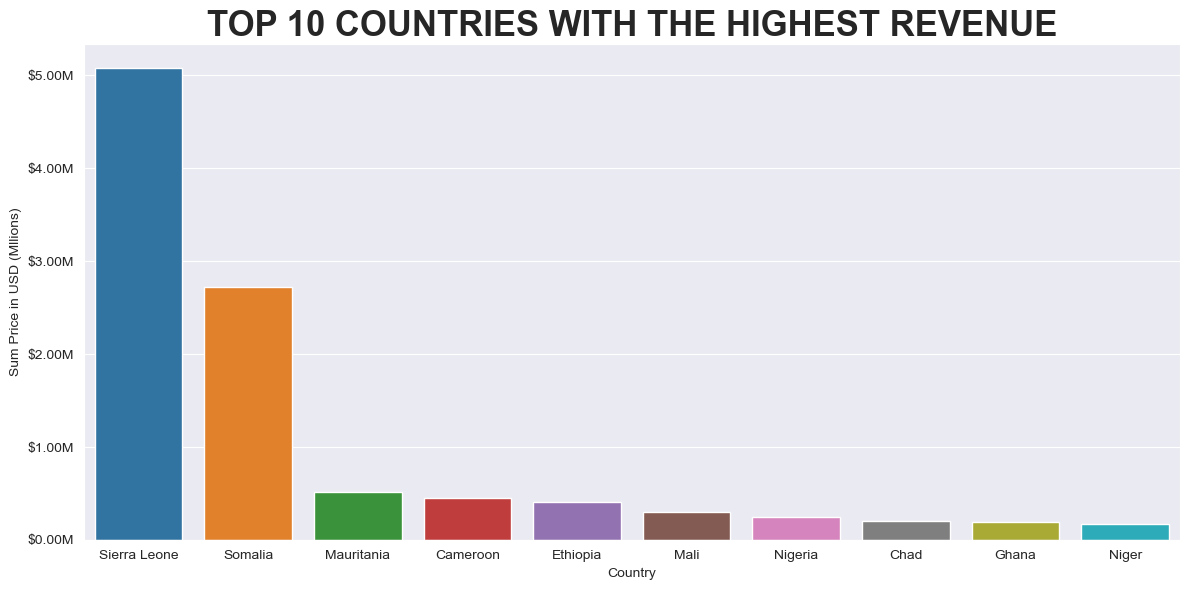

In [55]:
price_countries = afb.groupby('country')['price_in_usd'].sum().nlargest(10).reset_index()
plt.figure(figsize=(12, 6))
sns.set_style('darkgrid')
sns.barplot (x='country', y='price_in_usd', data=price_countries)
#Format the price axis to give trillion number units
def format_Millions(x, pos):
    """Format tick labels as Millions."""
    return f"${x / 1e6:.2f}M"
formatter = FuncFormatter(format_Millions)
plt.gca().yaxis.set_major_formatter(formatter)

# Adding labels and title
plt.ylabel('Sum Price in USD (Mllions)')
plt.xlabel('Country')
plt.title('TOP 10 COUNTRIES WITH THE HIGHEST REVENUE',fontweight='bold',fontsize='25')

plt.tight_layout()
plt.show()

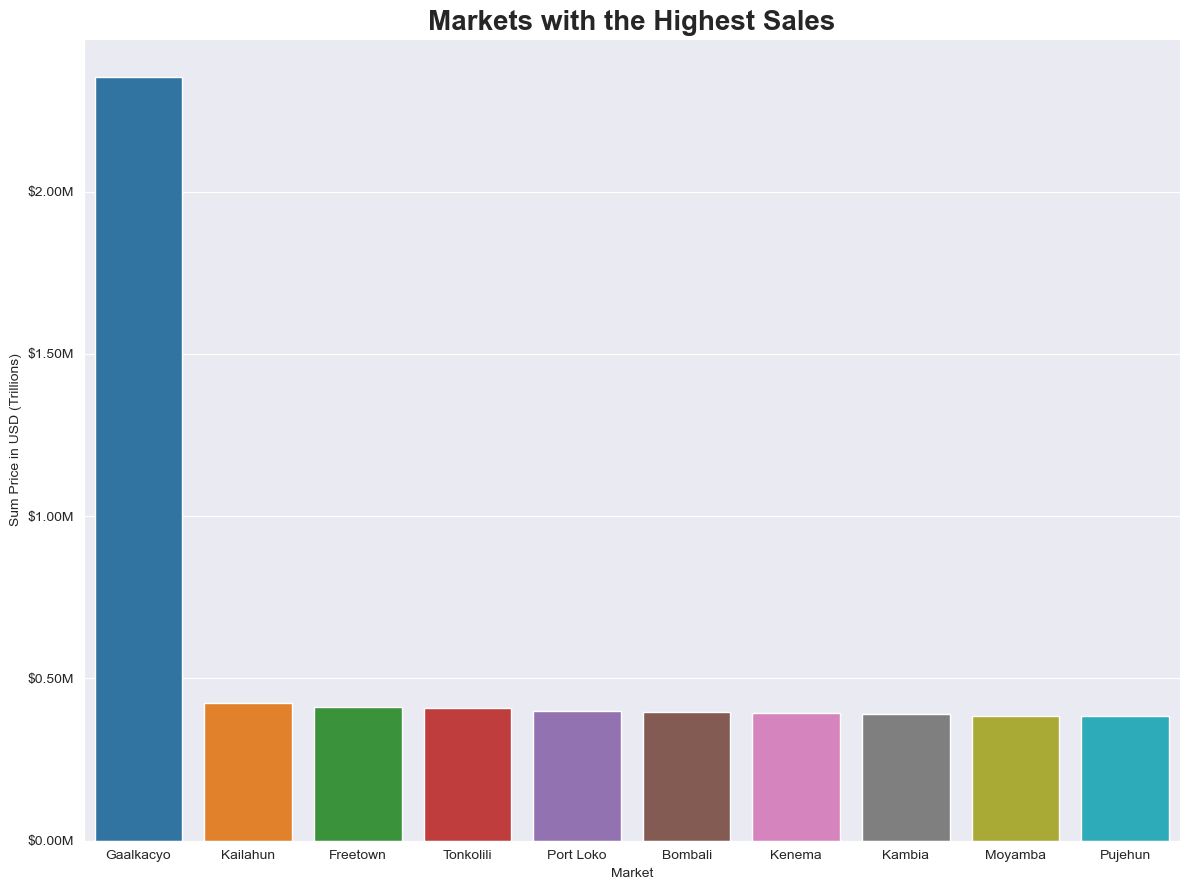

In [56]:
market_price = afb.groupby('market')['price_in_usd'].sum().nlargest(10).reset_index()
plt.figure(figsize=(12,9))
sns.set_style('darkgrid')
sns.barplot (x='market',y='price_in_usd', data=market_price)
def format_Millions(x, pos):
    """Format tick labels as Millions."""
    return f"${x / 1e6:.2f}M"
formatter = FuncFormatter(format_Millions)
plt.gca().yaxis.set_major_formatter(formatter)
plt.ylabel('Sum Price in USD (Trillions)')
plt.xlabel('Market')
plt.title('Markets with the Highest Sales',fontweight='bold',fontsize='20')

plt.tight_layout()
plt.show()

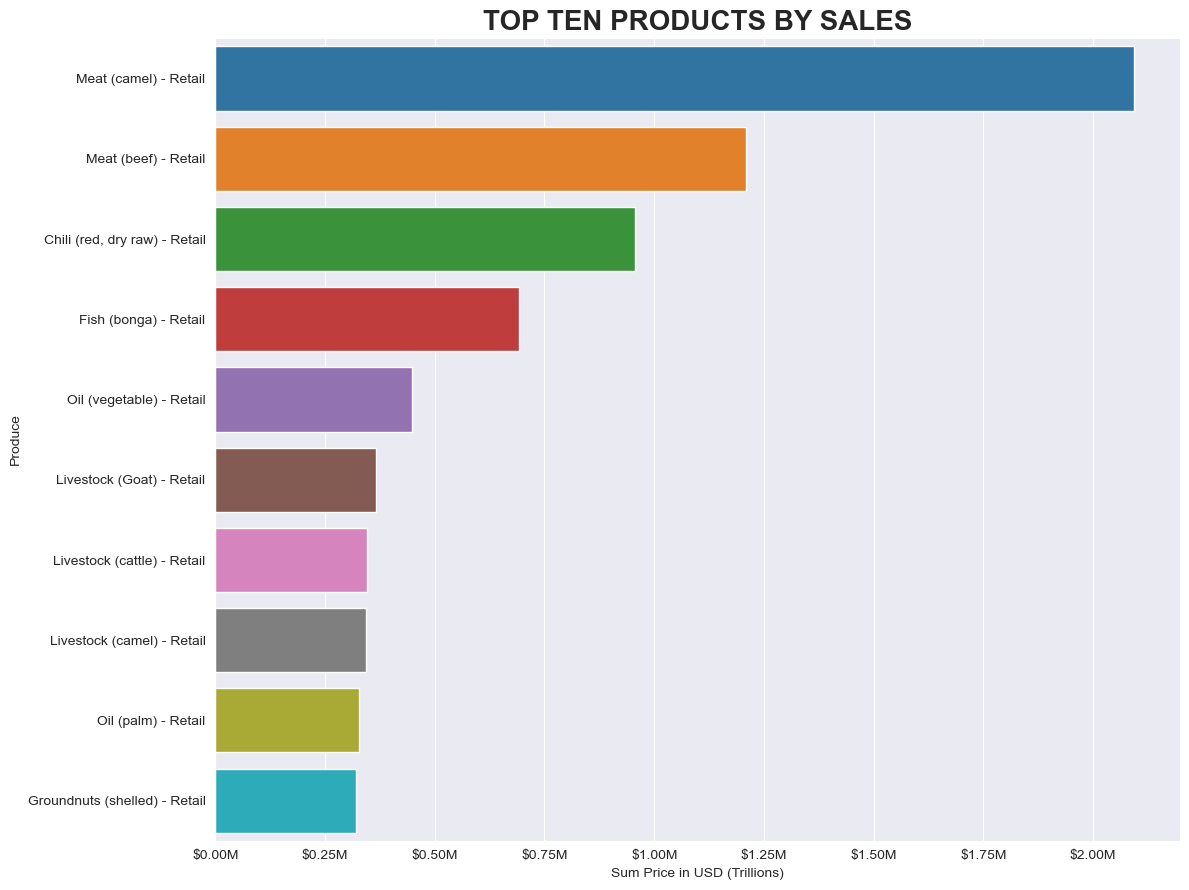

In [57]:
price_produce = afb.groupby('produce')['price_in_usd'].sum().nlargest(10).reset_index()
plt.figure(figsize=(12,9))
sns.set_style('darkgrid')
sns.barplot (y='produce', x='price_in_usd', data=price_produce,)
def format_Millions(x, pos):
    """Format tick labels as Millions."""
    return f"${x / 1e6:.2f}M"
formatter = FuncFormatter(format_Millions)
plt.gca().xaxis.set_major_formatter(formatter)
plt.xlabel('Sum Price in USD (Trillions)')
plt.ylabel('Produce')
plt.title('TOP TEN PRODUCTS BY SALES',fontweight='bold',fontsize='20')

plt.tight_layout()
plt.show()

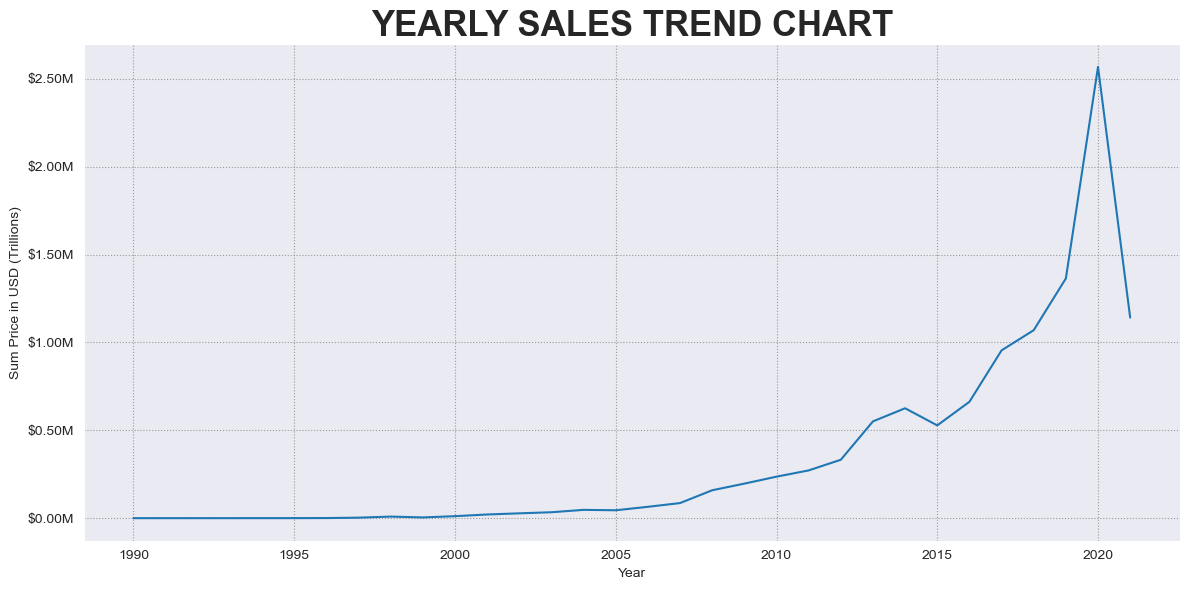

In [68]:
yearly_sales = afb.groupby('year')['price_in_usd'].sum().reset_index()
def format_Millions(x, pos):
    """Format tick labels as Millions."""
    return f"${x / 1e6:.2f}M"
formatter = FuncFormatter(format_Millions)
plt.figure(figsize=(12, 6))
sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})
sns.lineplot(x='year', y='price_in_usd', data=yearly_sales,)
plt.gca().yaxis.set_major_formatter(formatter)


plt.xlabel('Year')
plt.ylabel('Sum Price in USD (Trillions)')
plt.title('YEARLY SALES TREND CHART',fontweight='bold',fontsize='25')
plt.tight_layout()
plt.show()

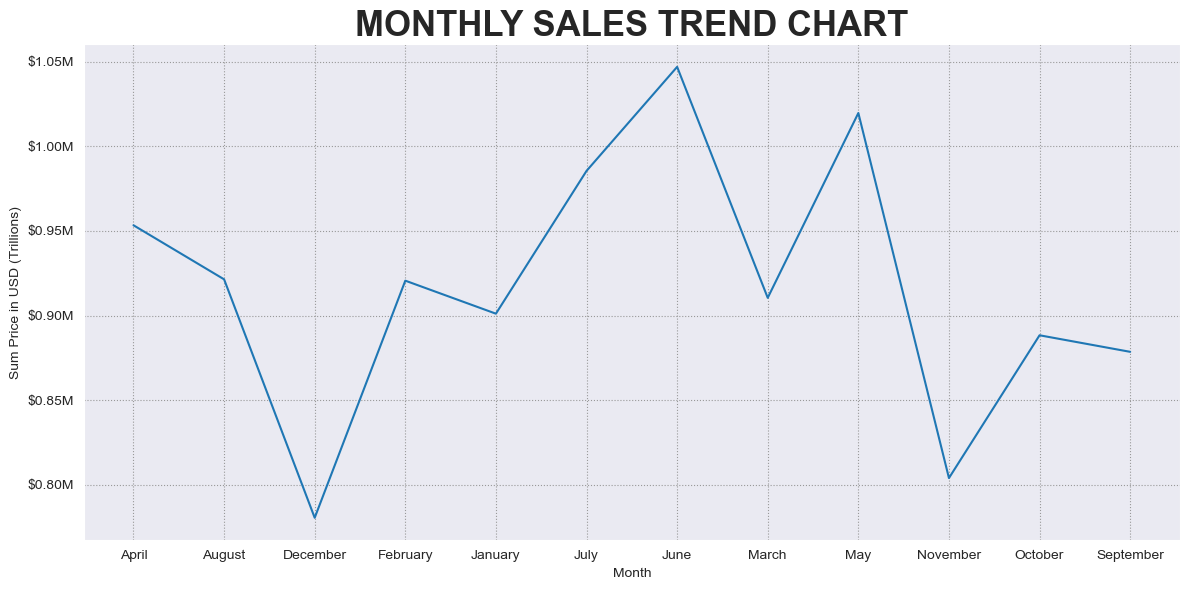

In [69]:
monthly_sales = afb.groupby('month_name')['price_in_usd'].sum().reset_index()
def format_Millions(x, pos):
    """Format tick labels as Millions."""
    return f"${x / 1e6:.2f}M"
formatter = FuncFormatter(format_Millions)

plt.figure(figsize=(12, 6))
sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})
sns.lineplot(x='month_name', y='price_in_usd', data=monthly_sales,)
plt.gca().yaxis.set_major_formatter(formatter)


plt.xlabel('Month')
plt.ylabel('Sum Price in USD (Trillions)')
plt.title('MONTHLY SALES TREND CHART',fontweight='bold',fontsize='25')
plt.tight_layout()
plt.show()